In [326]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [327]:
import os

In [328]:
import pylab_util as PU

In [329]:
import serial

In [330]:
import serial_utils

In [331]:
import importlib

In [332]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [333]:
import re

In [334]:
p = re.compile("^[0-9.]+,.*")

In [335]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [336]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram'

In [337]:
ls /dev/tty*

/dev/tty  /dev/ttyACM2


## Get the portname

In [338]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM2


In [339]:
ser = serial_utils.serial_test(portname)

In [340]:
ser.open()

In [341]:
ser.print_all()

OOP for digcomp DC motor Control v.1.1
using rtblockdiagram library
enter any character to start a test



In [342]:
ser.flush()

In [343]:
ser.write_char('s')

In [344]:
data = ser.get_data()

In [345]:
data2 = ser.get_data()

In [346]:
data += data2

In [347]:
print(data)

t0 =2415080
1.43,0,0,0,0
3.48,0,0,0,0
5.52,0,0,0,0
7.57,0,0,0,0
9.62,0,0,0,0
11.67,0,0,0,0
13.72,0,0,0,0
15.76,0,0,0,0
17.81,0,0,0,0
19.86,0,0,0,0
21.91,0,0,0,0
23.96,0,0,0,0
26.00,0,0,0,0
28.05,0,0,0,0
30.10,0,0,0,0
32.15,0,0,0,0
34.20,0,0,0,0
36.24,0,0,0,0
38.29,0,0,0,0
40.34,0,0,0,0
42.39,0,0,0,0
44.44,0,0,0,0
46.48,0,0,0,0
48.53,0,0,0,0
50.58,0,0,0,0
52.63,0,0,0,0
54.68,0,0,0,0
56.73,0,0,0,0
58.77,0,0,0,0
60.82,0,0,0,0
62.87,0,0,0,0
64.92,0,0,0,0
66.96,0,0,0,0
69.01,0,0,0,0
71.06,0,0,0,0
73.11,0,0,0,0
75.16,0,0,0,0
77.20,0,0,0,0
79.25,0,0,0,0
81.30,0,0,0,0
83.35,0,0,0,0
85.40,0,0,0,0
87.44,0,0,0,0
89.49,0,0,0,0
91.54,0,0,0,0
93.59,0,0,0,0
95.64,0,0,0,0
97.68,0,0,0,0
99.73,0,0,0,0
101.78,0,0,0,0
103.83,0,0,0,0
105.88,0,0,0,0
107.92,0,0,0,0
109.97,0,0,0,0
112.02,0,0,0,0
114.07,0,0,0,0
116.12,0,0,0,0
118.17,0,0,0,0
120.21,0,0,0,0
122.26,0,0,0,0
124.31,0,0,0,0
126.36,0,0,0,0
128.40,0,0,0,0
130.45,0,0,0,0
132.50,0,0,0,0
134.55,0,0,0,0
136.60,0,0,0,0
138.64,0,0,0,0
140.69,0,0,0,0
142.74,

In [348]:
float_array = data_to_float_array(data)

In [349]:
t = float_array[:,0]

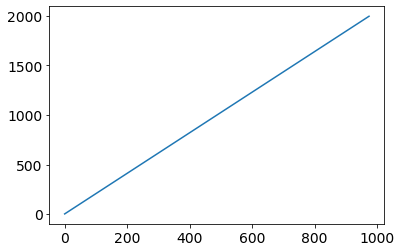

In [350]:
plt.figure()
plt.plot(t)

In [351]:
dt_array = t[1:]-t[0:-1]

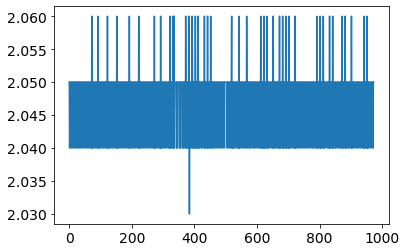

In [352]:
plt.figure()
plt.plot(dt_array)

In [353]:
enc = float_array[:,-1]

In [354]:
v_sat = float_array[:,2]

(0.0, 2000.0)

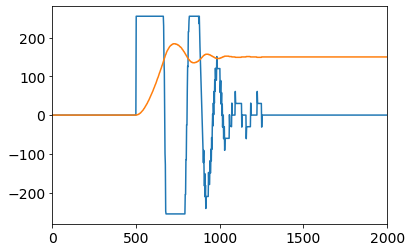

In [355]:
plt.figure()
plt.plot(t,v_sat,t,enc)
#plt.ylim([-5,260])
plt.xlim([0,2000])

In [356]:
ser.close()

In [357]:
data_out = float_array

In [358]:
fn = "digcomp_library_debugged.csv"

In [359]:
np.savetxt(fn,data_out,delimiter=',')